In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch

In [2]:
data = pd.read_csv("../data/mnist_digits.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print("Number of data: ", len(data))
print(data.shape)

Number of data:  42000
(42000, 785)


There are 42000 data point in this dataset. Each image has 784 pixel (excluding the label column)

In [7]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


(29399,)
(29399, 784)
transform


C:\Users\Angkor Computer\AppData\Local\Temp\ipykernel_19684\2772112163.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


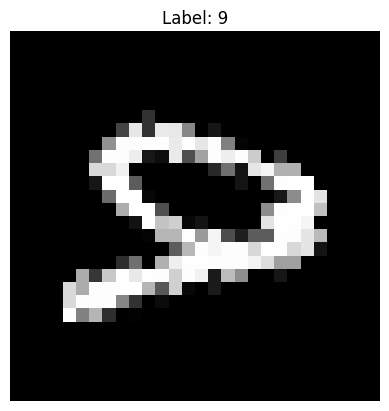

In [82]:
class Data(Dataset):

    def __init__(self, file, split="train", train_ratio=0.7):

        data = pd.read_csv(file)
        data = np.array(data)

        labels = data[:, 0].astype(int)
        images = data[:, 1:] / 255.0

        split_index = int(len(data) * train_ratio)

        self.split = split
        
        if split == "train":
            self.labels = labels[:split_index]
            self.images = images[:split_index]

 
        elif split == "val":
            self.labels, self.images = labels[split_index:], images[split_index:]
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image = self.images[index].reshape(28, 28).astype(np.float32)
        label = self.labels[index]

        # Apply transformations if defined
        if self.split == "train":
            image = self.augmentation(image)
            print("transform")

        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

    def augmentation(self, image):
        # Data augmentation
        transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.RandomRotation(45),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor() 
        ])

        augmented_image = transform(image)
        return augmented_image


    def show(self):
        print(self.labels.shape)
        print(self.images.shape)

    def show_image(self, index):
        """Plot an image and its label."""
        image, label = self.__getitem__(index)  # Retrieve item
        image_np = image.permute(1, 2, 0).squeeze().numpy()  # Convert tensor to NumPy array

        plt.imshow(image_np, cmap="gray")
        plt.title(f"Label: {label.item()}")
        plt.axis("off")
        plt.show()


train_dataset = Data(file="../data/mnist_digits.csv", split="train", train_ratio=0.7)
val_dataset = Data(file="../data/mnist_digits.csv", split="val", train_ratio=0.7)

train_dataset.show()
train_dataset.show_image(index=100)
